# Cuda Notebook

In [210]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [211]:
tk_random = th.Thicket.from_caliperreader(glob("*random.cali"))
tk_random.statsframe.dataframe["time"] = 1
gb_random = tk_random.groupby("InputSize")
ctk_random = th.Thicket.concat_thickets(
    thickets=list(gb_random.values()),
    headers=list(gb_random.keys()),
    axis="columns",
    metadata_key="num_threads"
)
# Drop unwanted columns
ctk_random.dataframe = ctk_random.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank"), (16777216, "Min time/rank")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank"), (16777216, "Max time/rank")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time"), (16777216, "Total time")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Min GPU time/rank"), (262144, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (4194304, "Min GPU time/rank"), (16777216, "Min GPU time/rank")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (4194304, "Max GPU time/rank"), (16777216, "Max GPU time/rank")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (4194304, "Avg GPU time/rank"), (16777216, "Avg GPU time/rank")], axis=1)

ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "Total GPU time"), (262144, "Total GPU time"), (1048576, "Total GPU time"), (4194304, "Total GPU time"), (16777216, "Total GPU time")], axis=1)
ctk_random.dataframe = ctk_random.dataframe.drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel"), (16777216, "spot.channel")], axis=1)# Rename index to remove tuple
ctk_random.dataframe = ctk_random.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b70b3fafe50>, 262144: <thicket.thicket.Thicket object at 0x2b70b35843d0>, 1048576: <thicket.thicket.Thicket object at 0x2b70b3b430d0>, 4194304: <thicket.thicket.Thicket object at 0x2b70b81eaaf0>, 16777216: <thicket.thicket.Thicket object at 0x2b70b399da00>}


In [212]:
tk_perturbed = th.Thicket.from_caliperreader(glob("*perturbed.cali"))
tk_perturbed.statsframe.dataframe["time"] = 1
gb_perturbed = tk_perturbed.groupby("InputSize")
ctk_perturbed = th.Thicket.concat_thickets(
    thickets=list(gb_perturbed.values()),
    headers=list(gb_perturbed.keys()),
    axis="columns",
    metadata_key="num_threads"
)
# Drop unwanted columns
ctk_perturbed.dataframe = ctk_perturbed.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank"), (16777216, "Min time/rank")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank"), (16777216, "Max time/rank")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time"), (16777216, "Total time")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Min GPU time/rank"), (262144, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (4194304, "Min GPU time/rank"), (16777216, "Min GPU time/rank")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (4194304, "Max GPU time/rank"), (16777216, "Max GPU time/rank")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (4194304, "Avg GPU time/rank"), (16777216, "Avg GPU time/rank")], axis=1)

ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "Total GPU time"), (262144, "Total GPU time"), (1048576, "Total GPU time"), (4194304, "Total GPU time"), (16777216, "Total GPU time")], axis=1)
ctk_perturbed.dataframe = ctk_perturbed.dataframe.drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel"), (16777216, "spot.channel")], axis=1)# Rename index to remove tuple
ctk_perturbed.dataframe = ctk_perturbed.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b70b3b89910>, 262144: <thicket.thicket.Thicket object at 0x2b70b3c37fa0>, 1048576: <thicket.thicket.Thicket object at 0x2b70b3ad1310>, 4194304: <thicket.thicket.Thicket object at 0x2b70b39b08e0>, 16777216: <thicket.thicket.Thicket object at 0x2b70b358b460>}


In [213]:
tk_sorted = th.Thicket.from_caliperreader(glob("*sorted.cali"))
tk_sorted.statsframe.dataframe["time"] = 1
gb_sorted = tk_sorted.groupby("InputSize")
ctk_sorted = th.Thicket.concat_thickets(
    thickets=list(gb_sorted.values()),
    headers=list(gb_sorted.keys()),
    axis="columns",
    metadata_key="num_threads"
)
# Drop unwanted columns
ctk_sorted.dataframe = ctk_sorted.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank"), (16777216, "Min time/rank")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank"), (16777216, "Max time/rank")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time"), (16777216, "Total time")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Min GPU time/rank"), (262144, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (4194304, "Min GPU time/rank"), (16777216, "Min GPU time/rank")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (4194304, "Max GPU time/rank"), (16777216, "Max GPU time/rank")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (4194304, "Avg GPU time/rank"), (16777216, "Avg GPU time/rank")], axis=1)

ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "Total GPU time"), (262144, "Total GPU time"), (1048576, "Total GPU time"), (4194304, "Total GPU time"), (16777216, "Total GPU time")], axis=1)
ctk_sorted.dataframe = ctk_sorted.dataframe.drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel"), (16777216, "spot.channel")], axis=1)# Rename index to remove tuple
ctk_sorted.dataframe = ctk_sorted.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b70b3eadc10>, 262144: <thicket.thicket.Thicket object at 0x2b70b860ae50>, 1048576: <thicket.thicket.Thicket object at 0x2b70b8395790>, 4194304: <thicket.thicket.Thicket object at 0x2b70b877e130>, 16777216: <thicket.thicket.Thicket object at 0x2b70b806b910>}


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [214]:
tk_reverse = th.Thicket.from_caliperreader(glob("*reverse.cali"))
tk_reverse.statsframe.dataframe["time"] = 1
gb_reverse = tk_reverse.groupby("InputSize")
ctk_reverse = th.Thicket.concat_thickets(
    thickets=list(gb_reverse.values()),
    headers=list(gb_reverse.keys()),
    axis="columns",
    metadata_key="num_threads"
)
# Drop unwanted columns
ctk_reverse.dataframe = ctk_reverse.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid"), (16777216, "nid")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank"), (16777216, "Min time/rank")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank"), (16777216, "Max time/rank")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time"), (16777216, "Total time")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Min GPU time/rank"), (262144, "Min GPU time/rank"), (1048576, "Min GPU time/rank"), (4194304, "Min GPU time/rank"), (16777216, "Min GPU time/rank")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Max GPU time/rank"), (262144, "Max GPU time/rank"), (1048576, "Max GPU time/rank"), (4194304, "Max GPU time/rank"), (16777216, "Max GPU time/rank")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Avg GPU time/rank"), (262144, "Avg GPU time/rank"), (1048576, "Avg GPU time/rank"), (4194304, "Avg GPU time/rank"), (16777216, "Avg GPU time/rank")], axis=1)

ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "Total GPU time"), (262144, "Total GPU time"), (1048576, "Total GPU time"), (4194304, "Total GPU time"), (16777216, "Total GPU time")], axis=1)
ctk_reverse.dataframe = ctk_reverse.dataframe.drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel"), (16777216, "spot.channel")], axis=1)# Rename index to remove tuple
ctk_reverse.dataframe = ctk_reverse.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

5  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b70b38c66a0>, 262144: <thicket.thicket.Thicket object at 0x2b70b8768100>, 1048576: <thicket.thicket.Thicket object at 0x2b70b3e8cc10>, 4194304: <thicket.thicket.Thicket object at 0x2b70b8229460>, 16777216: <thicket.thicket.Thicket object at 0x2b70b805ff10>}


In [215]:
ctk_reverse.dataframe.loc["comp"]

,65536,262144,1048576,4194304,16777216
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_threads,,,,,
128,0.412078,1.832329,12.063102,123.825972,2488.127905
256,0.403752,1.632340,9.264302,83.583091,2095.985272
512,0.407652,1.713059,8.598557,71.550535,1918.380692
1024,0.366629,1.604479,8.651994,73.112293,1928.623790


In [228]:
# Define common variables
#function_names = set(ctk_random.dataframe.index.get_level_values("name"))
function_names = ["comp_large", "comm", "main"]
print(function_names)
threads = sorted(list(set(ctk_random.dataframe.index.get_level_values("num_threads"))))
print(threads)
array_sizes = [65536, 262144, 1048576, 4194304, 16777216] # append as necessary

['comp_large', 'comm', 'main']
[128, 256, 512, 1024]


# Weak Scale Plotting

In [229]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df,
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(array_sizes) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

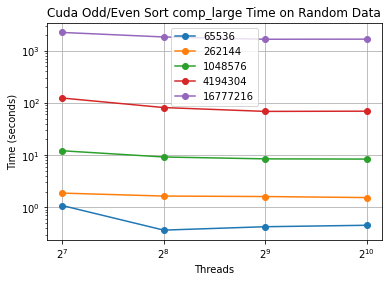

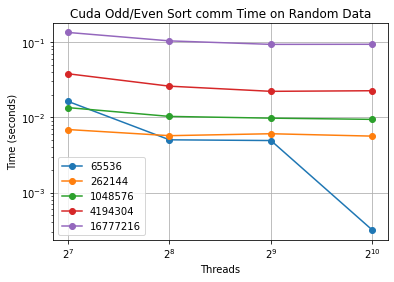

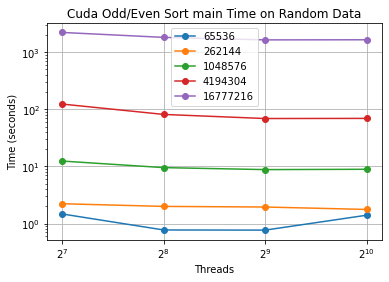

In [230]:
for name in function_names:
    plot_mpl(
        df=ctk_random.dataframe.loc[name], # change ctk_* to whatever input type
        title="Cuda Odd/Even Sort {} Time on Random Data".format(name), # change title to reflect input type
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

# Strong Scale Plotting

In [231]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    

    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.plot(
        df[3],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Random", "Perturbed", "Sorted", "Reverse"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks([128, 256, 512, 1024])
    plt.show()
    return fig, ax

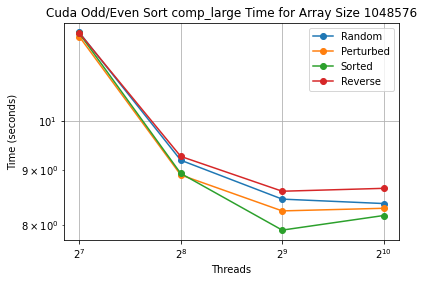

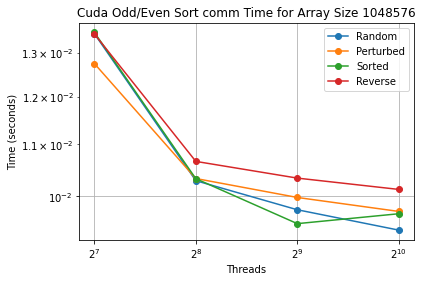

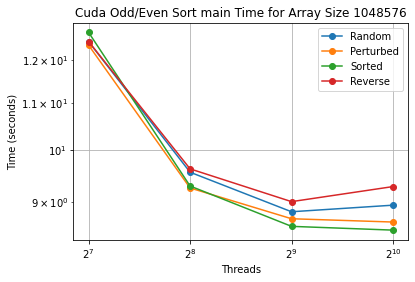

In [232]:
array_size = 1048576
for name in function_names:
    plot_mpl(
        df=[ctk_random.dataframe.loc[name][array_size]["Avg time/rank"], 
            ctk_perturbed.dataframe.loc[name][array_size]["Avg time/rank"],
            ctk_sorted.dataframe.loc[name][array_size]["Avg time/rank"],
            ctk_reverse.dataframe.loc[name][array_size]["Avg time/rank"]],
        title="Cuda Odd/Even Sort {} Time for Array Size {}".format(name, array_size),
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

# Speedup Plotting

In [233]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df,
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(array_sizes) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

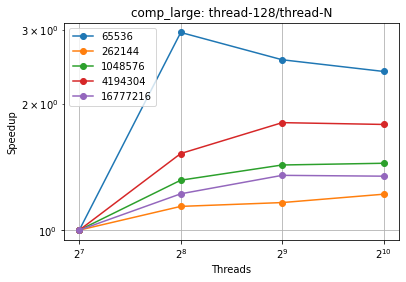

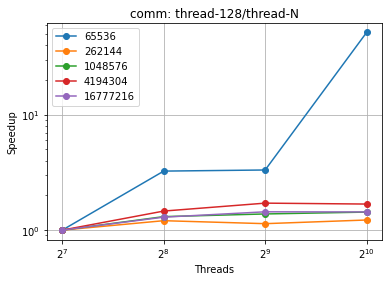

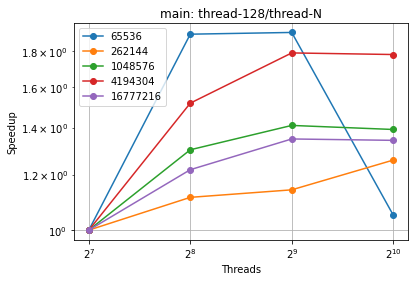

In [234]:
speedup_df = ctk_random.dataframe.loc[(slice(None),128), :].reset_index().drop("num_threads", axis=1).set_index('name')/ctk_random.dataframe
for name in function_names:
    plot_mpl(
        df=speedup_df.loc[name],
        title=f"{name}: thread-128/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
    )

In [ ]:
d